# Loading required packages and data

In [1]:
library(Seurat)
library(future)
library(ggplot2)
library(SeuratDisk)
library(here)
library(tidyverse)
library(dplyr)

mouse_panel = read.csv('/projects/pfenninggroup/spatial/resources/panels/original_mouse_brain_markers.csv')

colors_new_labels = c('#0075DC','#993F00','#4C005C','#191919',         '#2BCE48','#FFCC99'        ,'#94FFB5','#8F7C00','#9DCC00',
         '#C20088','#003380','#FFA405',         '#FFA8BB','#426600','#FF0010')

save = TRUE

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

here() starts at /projects/pfenninggroup/singleCell/Macaque_SealDorsalHorn_snATAC-seq

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
main_path = '/projects/pfenninggroup/spatial/seal/mouse_spinal_cord_xenium_first_run/'
saline_data = paste0(main_path, 'output-XETG00176__0010684__SALINE__20231107__233200')
xenium.obj <- LoadXenium(saline_data, fov = "fov")
xenium.obj <- subset(xenium.obj, subset = nCount_Xenium > 0)

10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warn

In [3]:
# ## run below to label the project

top_annotation <- readRDS("/projects/pfenninggroup/spatial/seal/mouse_spinal_cord_xenium_first_run/rdas/first_run_saline_top_annotation.rds")
subtype_annotation <- readRDS("/projects/pfenninggroup/spatial/seal/mouse_spinal_cord_xenium_first_run/rdas/first_run_saline_subtype_annotation.rds")

xenium.obj$top_annotation = top_annotation
xenium.obj$subtype_annotation = subtype_annotation

In [4]:
# load russ et al data
filename = "/home/vijaykic/BaDoi/data/tidy_data/rdas/final_cluster_assignment.h5seurat"
mouse_rna = LoadH5Seurat(filename)
mouse_rna = mouse_rna[, mouse_rna$dataset == 'Sathyamurthy']
mouse_rna <- subset(x = mouse_rna, features = unique(mouse_panel$Genes) )
mouse_rna = mouse_rna[,mouse_rna$nCount_RNA > 0]
DefaultAssay(mouse_rna) = 'RNA'

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding miscellaneous information for RNA

Initializing integrated with data

Adding scale.data for integrated

Adding variable feature information for integrated

Adding miscellaneous information for integrated

Adding reduction pca

Adding cell embeddings for pca

Adding feature loadings for pca

Adding miscellaneous information for pca

Adding reduction umap

Adding cell embeddings for umap

Adding miscellaneous information for umap

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results

Adding data that was not associated with an assay

Warning message:
“Adding a command log without an assay associated with it”
Warning message:
“Adding a command log without an assay associated with it”
Warning message:
“Adding a command log without an assay associated with it”


In [5]:
mouse_rna$coarse_MN_subtypes <- mouse_rna$coarse_cell_types
mouse_rna$coarse_MN_subtypes[mouse_rna$final_cluster_assignment == 'MN.alpha'] = 'MN.alpha'
mouse_rna$coarse_MN_subtypes[mouse_rna$final_cluster_assignment == 'MN.gamma'] = 'MN.gamma'

In [6]:
mouse_rna <- SCTransform(mouse_rna)
mouse_rna <- RunPCA(mouse_rna, npcs = 30, features = rownames(mouse_rna))
mouse_rna <- RunUMAP(mouse_rna, dims = 1:30)

Running SCTransform on assay: RNA

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 238 by 19547

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 230 genes, 5000 cells

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or use

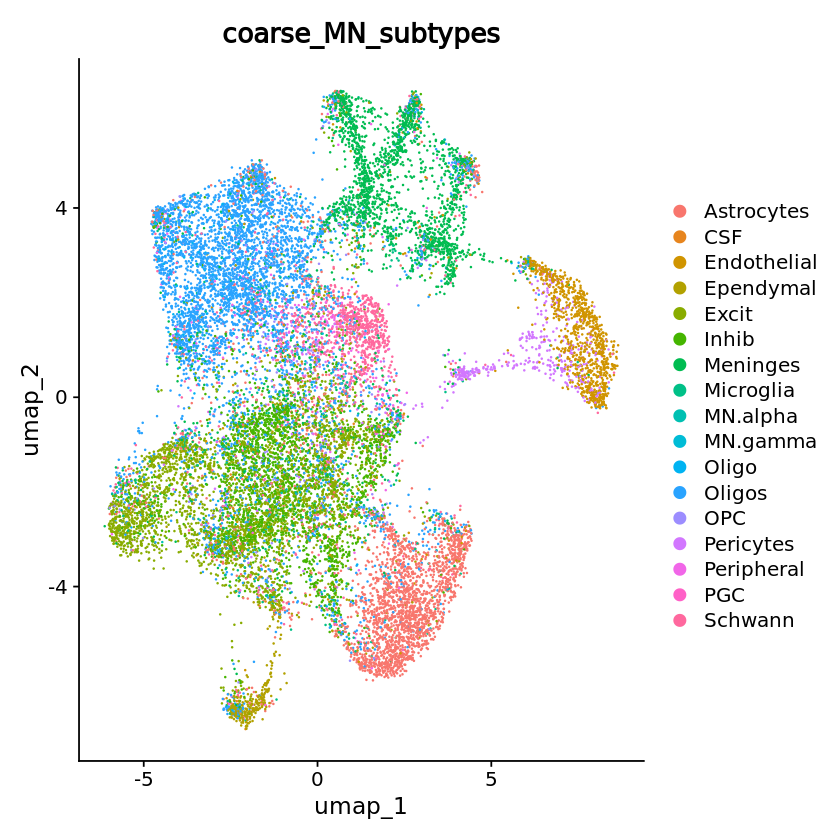

In [7]:
DimPlot(mouse_rna, group.by = 'coarse_MN_subtypes')

In [8]:
xenium.obj <- SCTransform(xenium.obj, assay = "Xenium")
xenium.obj <- RunPCA(xenium.obj, npcs = 30, features = rownames(xenium.obj))
xenium.obj <- RunUMAP(xenium.obj, dims = 1:30)
xenium.obj <- FindNeighbors(xenium.obj, reduction = "pca", dims = 1:30)
xenium.obj <- FindClusters(xenium.obj, resolution = 2)

Running SCTransform on assay: Xenium

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 247 by 49620

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 247 genes, 5000 cells

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE.”
Fou

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 49620
Number of edges: 1799801

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8604
Number of communities: 44
Elapsed time: 14 seconds


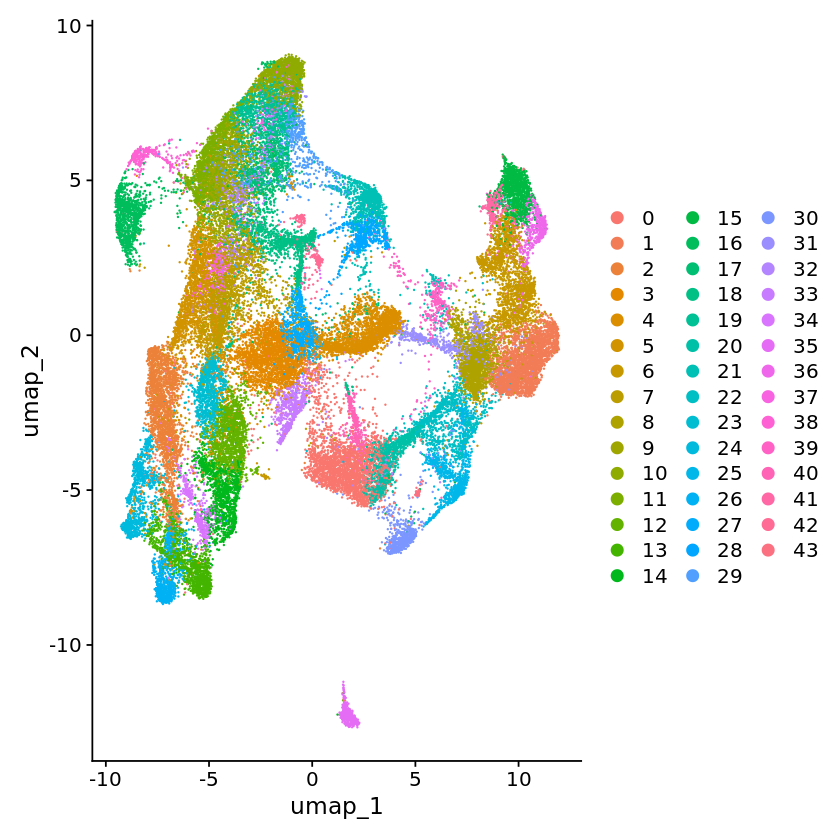

In [9]:
DimPlot(xenium.obj)

# The goal is to see whether the Xenium clusters with high Chat, Prph and Nrp2 correspond to the cell types with high expression of same genes found in the scRNA-seq data after integrating the spatial omics data with the transcriptomic data.

In [10]:
features <- SelectIntegrationFeatures(object.list = list(xenium.obj, mouse_rna))
space_rna.anchors <- FindIntegrationAnchors(object.list = list(xenium.obj, mouse_rna), anchor.features = features, k.filter = NA)
space_rna.combined <- IntegrateData(anchorset = space_rna.anchors, normalization.method = "SCT")

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Warning message:
“Adding image data that isn't associated with any assays”
Finding neighborhoods

Finding anchors

	Found 50515 anchors



[1] 1


Warning message:
“Different cells and/or features from existing assay SCT”


[1] 2


Merging dataset 2 into 1

Warning message:
“Adding image data that isn't associated with any assays”
Extracting anchors for merged samples

Warning message:
“Adding image data that isn't associated with any assays”
Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Different cells and/or features from existing assay integrated”
Warning message:
“Assay integrated changing from Assay to SCTAssay”
Warning message:
“Different cells and/or features from existing assay SCT”


In [11]:
# rename xenium clusters so they aren't overwritten when new clusters are found
space_rna.combined$orig_xenium_clusters <- space_rna.combined$seurat_clusters

# add species column
space_rna.combined$species = ifelse(!is.na(space_rna.combined$coarse_MN_subtypes), "Russ", "xenium")
space_rna.combined$integrated_celltype = ifelse(!is.na(space_rna.combined$coarse_MN_subtypes), 
                                                space_rna.combined$coarse_MN_subtypes, space_rna.combined$orig_xenium_clusters)

# Run the standard workflow for visualization and clustering
space_rna.combined <- ScaleData(space_rna.combined, verbose = FALSE)
space_rna.combined <- RunPCA(space_rna.combined, npcs = 30, verbose = FALSE)
space_rna.combined <- RunUMAP(space_rna.combined, reduction = "pca", dims = 1:30, return.model = TRUE)
space_rna.combined <- FindNeighbors(space_rna.combined, reduction = "pca", dims = 1:30)
space_rna.combined <- FindClusters(space_rna.combined, resolution = 2)

UMAP will return its model

19:14:32 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

19:14:32 Read 69167 rows and found 30 numeric columns

19:14:32 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

19:14:32 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:14:42 Writing NN index file to temp file /tmp/Rtmp4Cl4z1/file4036a6bfe5e64

19:14:42 Searching Annoy index using 1 thread, search_k = 3000

19:15:12 Annoy recall = 100%

19:15:14 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

19:15:18 Initializing

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 69167
Number of edges: 3040366

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8528
Number of communities: 47
Elapsed time: 23 seconds


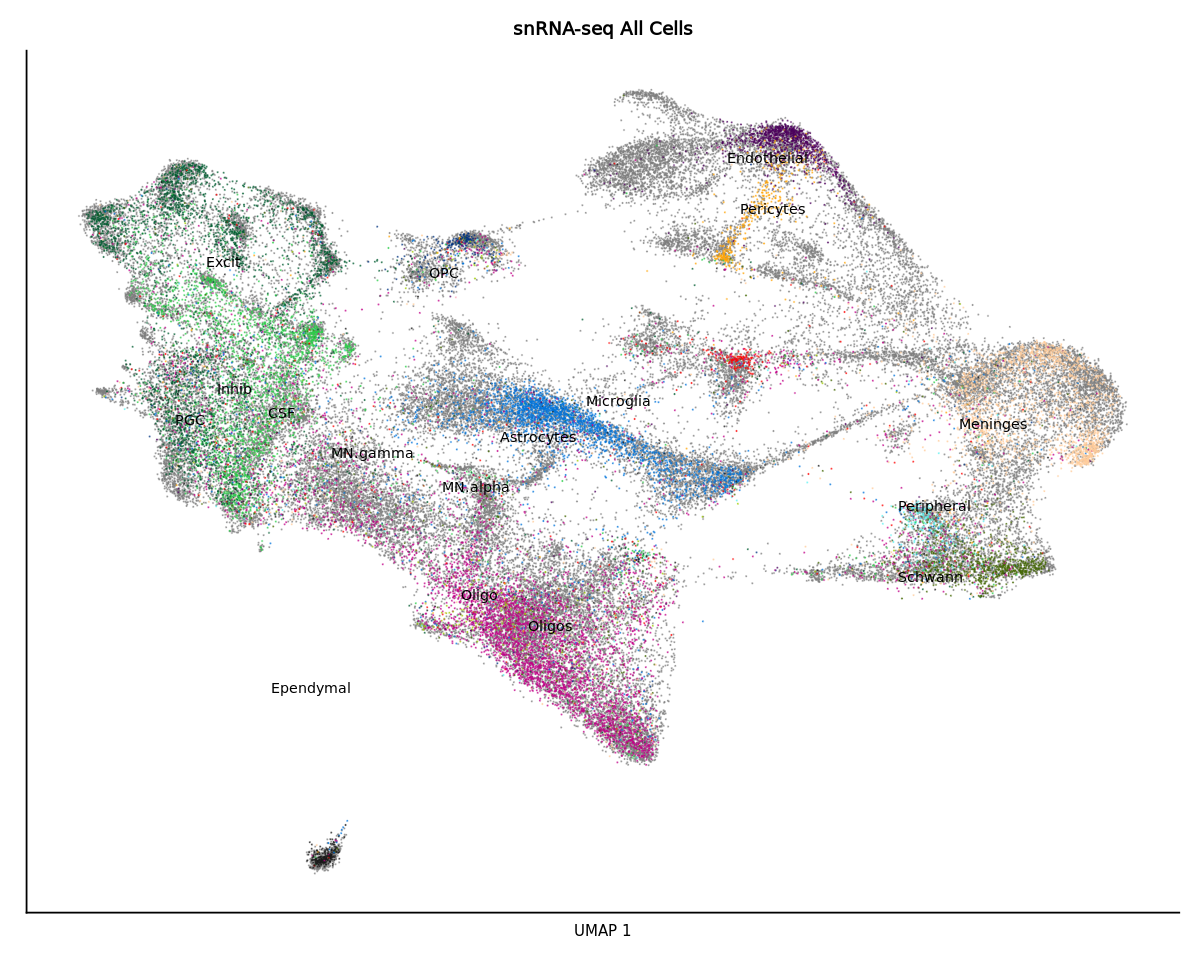

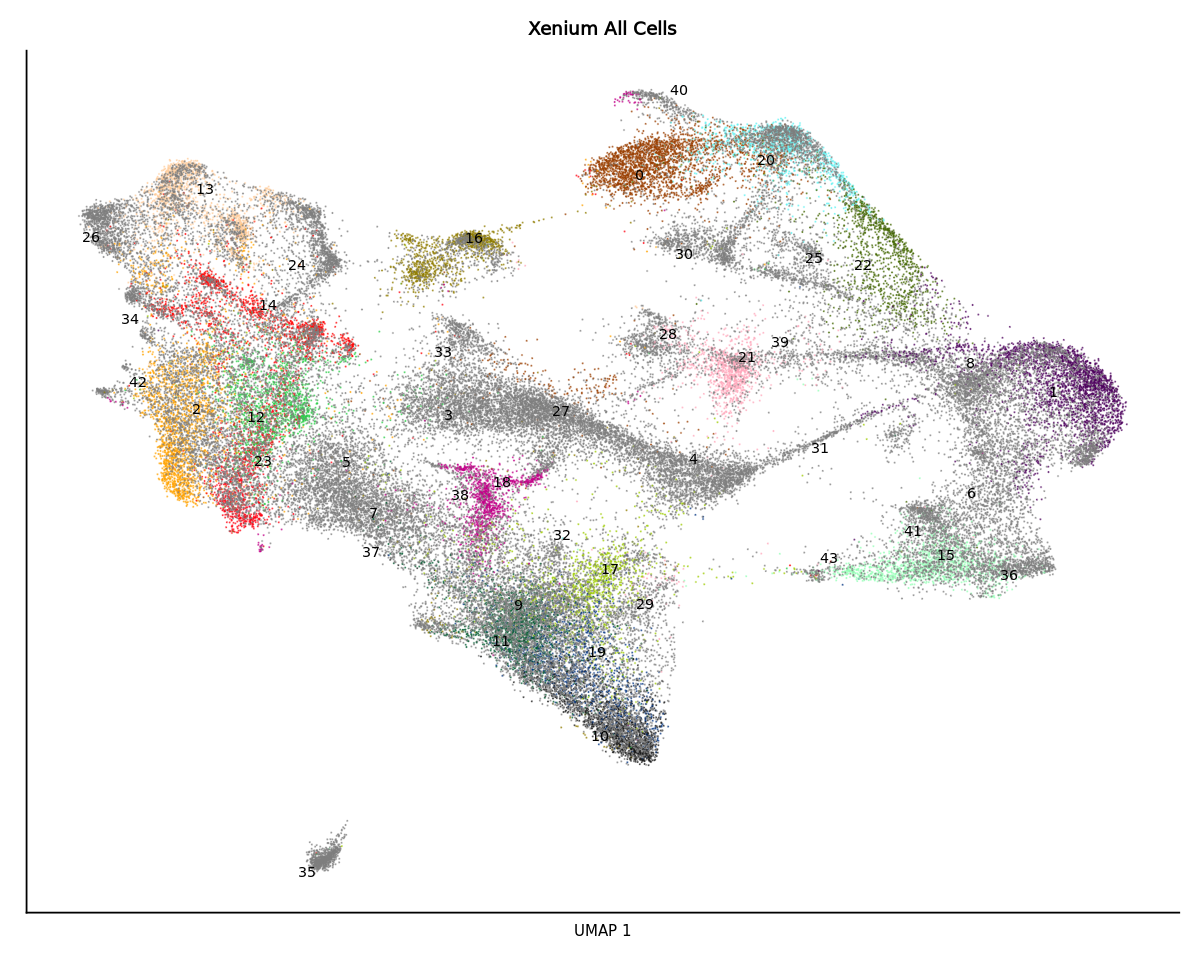

In [12]:
# visualize clusters
save = FALSE
options(repr.plot.width=10, repr.plot.height=8)
colors_macaque = c('#0075DC','#993F00','#4C005C','#191919','#005C31','#2BCE48','#FFCC99','red','#94FFB5','#8F7C00','#9DCC00',
         '#C20088','#003380','#FFA405','#5EF1F2','#FFA8BB','#426600','#FF0010')


p <- DimPlot(space_rna.combined, reduction = "umap", cols = colors_macaque, pt.size = 0.00001, alpha = 0.5,
          group.by = "coarse_MN_subtypes", label = TRUE,label.size = 3, repel = TRUE) + theme(axis.text.y=element_blank(), axis.ticks.y=element_blank(), axis.title.y=element_blank(),
                                                                    axis.ticks.x=element_blank(),axis.text.x=element_blank(),axis.title.x=element_text(size = 9),
                                                                    plot.title = element_text(size = 11), legend.text=element_text(size=3), axis.text=element_text(size=10),
                                                                     legend.position = "none") + 
            labs(title="snRNA-seq All Cells", x ="UMAP 1")
print(p)


p2 <- DimPlot(space_rna.combined, reduction = "umap", pt.size = 0.00001, alpha = 0.5, cols = colors_macaque[1:length(unique(space_rna.combined$orig_xenium_clusters)) + 1],
          group.by = "orig_xenium_clusters", label = TRUE,label.size = 3, repel = TRUE) + theme(axis.text.y=element_blank(), axis.ticks.y=element_blank(), axis.title.y=element_blank(),
                                                                    axis.ticks.x=element_blank(),axis.text.x=element_blank(),axis.title.x=element_text(size = 9),
                                                                    plot.title = element_text(size = 11), legend.text=element_text(size=3), axis.text=element_text(size=10),
                                                                     legend.position = "none") + 
            labs(title="Xenium All Cells", x ="UMAP 1")
print(p2)

In the overlay above, we observe that Xenium cluster 18 overlaps with alpha motor neurons, and Xenium cluster 42 overlaps with PGCs. From our earlier analysis, we identified clusters 18 and 42 as potentially significant, and this overlay shows some correspondence. However, the clustering is not entirely clear. One possible explanation is the limited representation of motor neurons in our input RNA-seq data, which is expected given that motor neurons are a rare cell population. To address this issue, we can integrate our current RNA-seq data with an additional RNA-seq dataset to increase the number of motor neuron cells. This approach may provide better insights into which Xenium clusters correspond to motor neurons.